(200, 2) (200,)


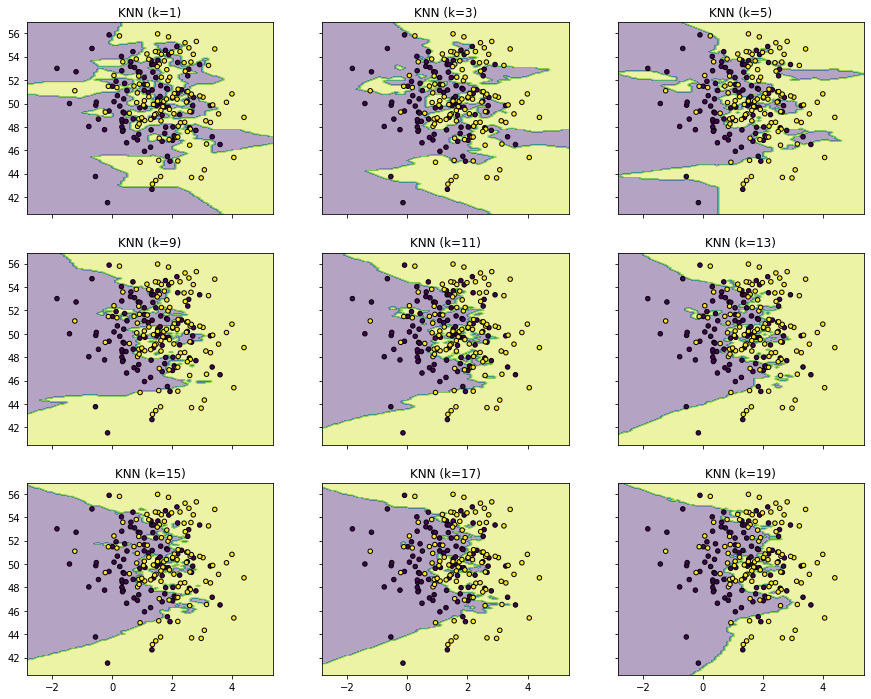

In [1]:
import matplotlib.pyplot as plt    
import numpy as np    
from itertools import product    
from sklearn.neighbors import KNeighborsClassifier 

# 生成一些随机样本    
n_points = 100    
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)    
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)    
X = np.concatenate([X1,X2])    
y = np.array([0]*n_points + [1]*n_points)    
print (X.shape, y.shape)    

# KNN模型的训练过程    
clfs = []    
neighbors = [1,3,5,9,11,13,15,17,19]    
for i in range(len(neighbors)):    
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))   

# 可视化结果    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1)) 
f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))   
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]), clfs,['KNN (k=%d)'%k for k in neighbors]):   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)    
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k') 
    axarr[idx[0], idx[1]].set_title(tt)    
plt.show()    